In [1]:
import os
import numpy as np
os.chdir("C:/Users/asivasu3/CODA_Python_OG")
from base import *

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')
nm = 'Arrun_CASE-UNet'


WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]


numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[170, 170, 255],
                   [  0,  85, 127],
                   [170,   0,   0],
                   [170, 170, 127],
                   [255, 0, 255],
                   [255, 255, 255],
                   [255, 170, 255]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

In [3]:
from base.backbones import *

In [4]:
BATCH_SIZE = 3
NUM_CLASSES = len(cmap)
IMAGE_SIZE = 1024
NUM_CLASSES = len(classNames)  # Number of classes

In [ ]:
model = model_call('CASe_UNet',IMAGE_SIZE=IMAGE_SIZE, NUM_CLASSES=NUM_CLASSES)
model.summary()

Saving model metadata and classification colormap...
Net file already exists, updating data...


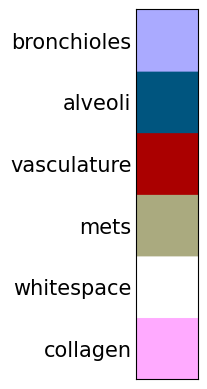

In [6]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [7]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making down-sampled images...
All down-sampled images already exist in the directory.
Image 1 of 4: 84 - 2024-02-26 10.33.40
 annotation data previously loaded
Image 2 of 4: 2024-02-26 10.36.39
 annotation data previously loaded
Image 3 of 4: TVNTC 1-2 2
 annotation data previously loaded
Image 4 of 4: TVWT 4-1 1
 annotation data previously loaded


In [9]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 28865500.0 pixels of bronchioles, 8% of the most common class.
 There are 125561600.0 pixels of alveoli, 37% of the most common class.
 There are 20396400.0 pixels of vasculature, 6% of the most common class.
 There are 33140500.0 pixels of mets, 9% of the most common class.
 There are 337923400.0 pixels of whitespace. This is the most common class.
 There are 20018100.0 pixels of collagen, 5% of the most common class.

Building training tiles...
Saving big tiles
  1 of 15 training images completed in 6 minutes
  Used 1367.2% counts and 100.0% unique annotations of bronchioles
  Used 959.5% counts and 100.0% unique annotations of alveoli
  Used 2058.2% counts and 100.0% unique annotations of vasculature
  Used 1571.4% counts and 100.0% unique annotations of mets
  Used 1343.2% counts and 100.0% unique annotations of whitespace
  Used 2046.8% counts and 100.0% unique annotations of collagen
Saving big tiles
  2 of

In [8]:
name = "CASe_UNet"

train_segmentation_model(pthDL,name)

No GPU available. Ensure that the NVIDIA GPU and CUDA are correctly installed.
Shape of data () ()
Starting model training...
Epoch 1/8
  5/500 [..............................] - ETA: 7:42:58 - loss: 28.1961 - accuracy: 0.2729

KeyboardInterrupt: 

Testing segmentation model......
 
Importing annotation data...
 
 Making down-sampled images...
All down-sampled images already exist in the directory.
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
  Image TVWT 2-2 2.tif already classified by this model
  Total time for classification: 0.0h 0.0m 6.782270669937134s

Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


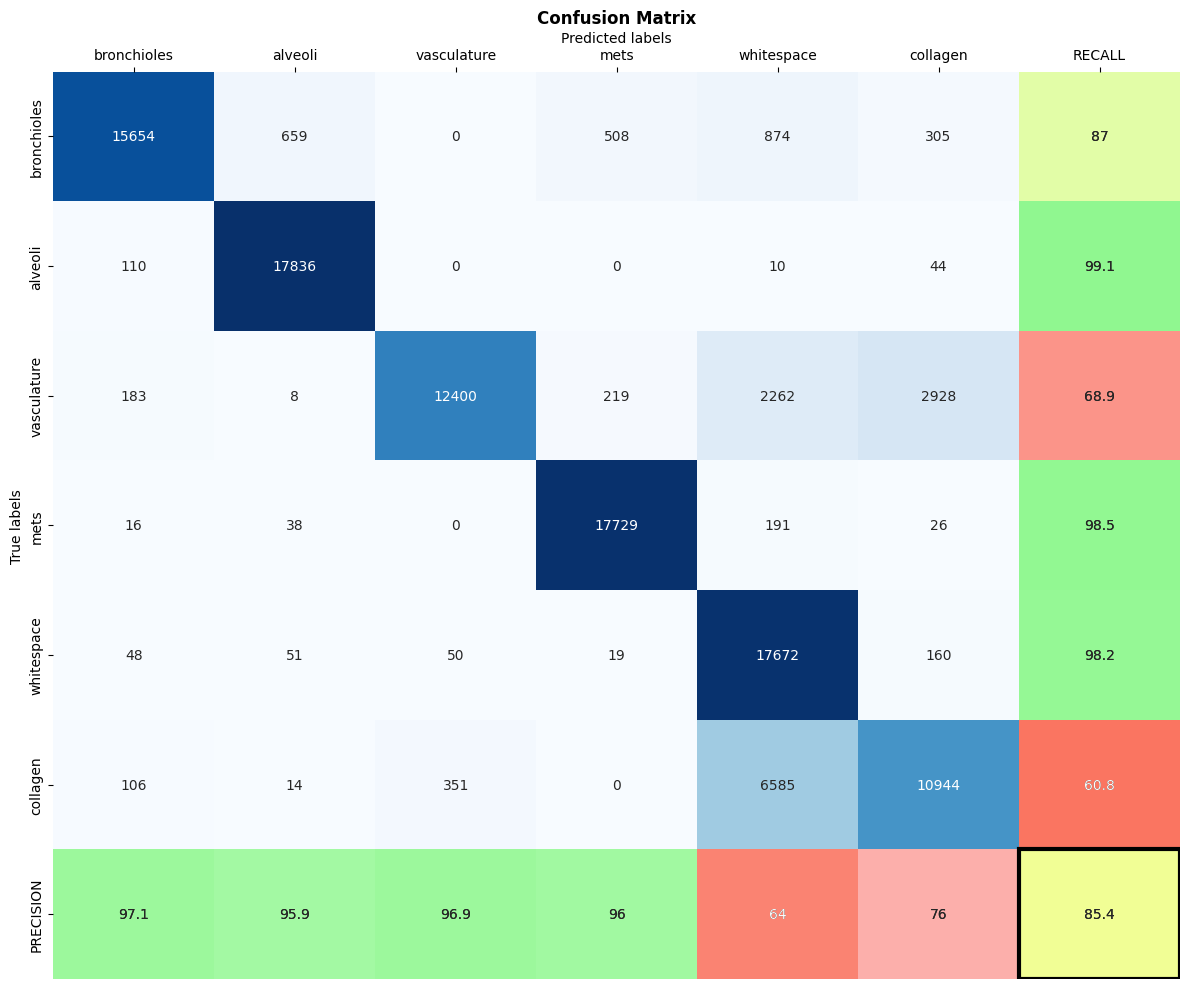


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\test lung\10_06_2024_forfun\confusion_matrix.jpg

Overall Accuracy: 85.4%


In [4]:
test_segmentation_model(pthDL,pthtest, pthtestim)

In [7]:
classify_images(pthim,pthDL)

   
  Starting classification of image 1 of 4: 2024-02-26 10.36.39.tif
  Image 2024-02-26 10.36.39.tif already classified by this model
  Starting classification of image 2 of 4: 84 - 2024-02-26 10.33.40.tif
  Image 84 - 2024-02-26 10.33.40.tif already classified by this model
  Starting classification of image 3 of 4: TVNTC 1-2 2.tif
  Image TVNTC 1-2 2.tif already classified by this model
  Starting classification of image 4 of 4: TVWT 4-1 1.tif
  Image TVWT 4-1 1.tif already classified by this model
  Total time for classification: 0.0h 0.0m 5.635400295257568s


'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\tissues for methods paper\\test lung\\5x\\classification_10_06_2024_forfun'